<a href="https://colab.research.google.com/github/zayo1511/LaboratorioDeAnalisisDeDatosFinancierosYDeDisenoDeIndicadores/blob/main/kmeans_orden_y_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab Notebooks/Laboratorio de analisis de datos financieros y de diseño de indicadores/Analisis estadistico avanzado para KPIs/'
from sklearn import set_config
set_config(working_memory=1024)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Clusters

In [ ]:
data = pd.read_csv(data_path + 'tlacuachitos_vip_customers_data.csv')
data.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31


In [ ]:
df_transactions = pd.read_csv(data_path + 'tlacuachitos_vip_transactions.csv')
df_transactions.head()

,CustomerID,TransactionDate,TransactionAmount
0,1,2023-10-31,518.444092
1,1,2024-07-31,353.796197
2,1,2024-01-31,38.206591
3,1,2024-06-30,724.929423
4,2,2022-02-28,145.616000


In [ ]:
numerical_features = ['Age', 'Income', 'Tenure']
categorical_features = ['Education', 'Industry', 'Geographic Location']

encoded_features = pd.get_dummies(data[categorical_features],
               columns=categorical_features,
               drop_first=True)

data_to_model_standarized = StandardScaler().fit_transform(data[numerical_features])

data_to_model_df = pd.DataFrame(data_to_model_standarized,
                                columns=numerical_features).reset_index()

encoded_features_df = encoded_features.reset_index()

data_to_model = data_to_model_df.merge(encoded_features_df, on='index')
data_to_model = data_to_model.drop('index', axis=1)

In [ ]:
# Dar más peso a ciertas variables para la agrupación
#data_to_model['Income'] = data_to_model['Income'] * 1.2
data_to_model

,Age,Income,Tenure,Education_High School,Education_Master,Education_PhD,Industry_Entertainment,Industry_Finance,Industry_Healthcare,Industry_Technology,Geographic Location_Australia,Geographic Location_Europe,Geographic Location_North America,Geographic Location_South America
0,0.824019,0.121621,-0.878889,False,True,False,False,False,False,True,False,True,False,False
1,1.688471,0.286515,0.451668,False,False,False,False,False,False,True,False,False,False,True
2,0.159056,0.460267,-0.878889,False,False,False,False,True,False,False,False,True,False,False
3,-0.771892,0.620095,-0.878889,True,False,False,False,False,False,False,False,False,False,True
4,1.090004,0.444917,0.008149,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.170870,-0.365427,1.338705,False,False,False,False,False,False,False,False,True,False,False
1139,0.491537,-0.713290,1.782224,False,False,False,False,False,False,False,False,False,False,False
1140,-0.971381,0.399656,0.008149,True,False,False,False,True,False,False,False,False,True,False
1141,0.558034,-1.035115,0.451668,False,False,False,False,False,True,False,False,False,True,False


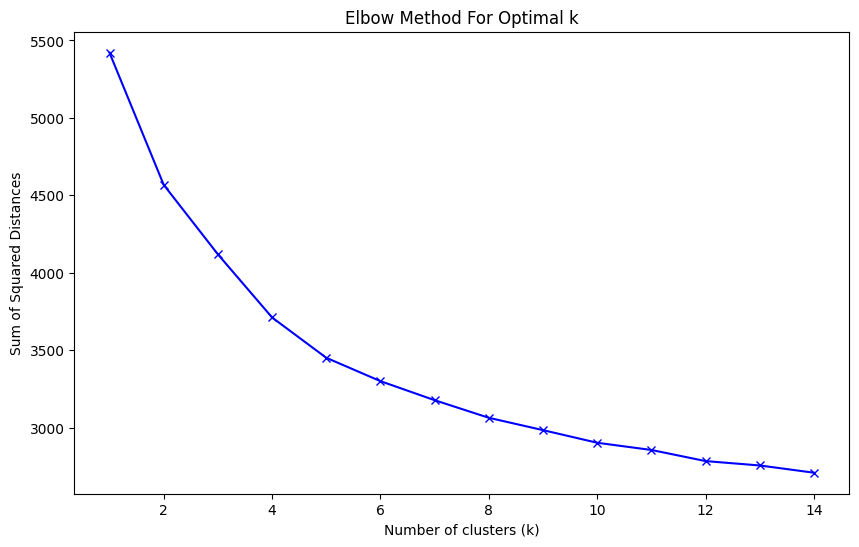

In [ ]:
sum_of_squared_distances = []
K = range(1, 15)  # Ajustar el rango según sea necesario
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(data_to_model)
    sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(data_to_model)

data_to_model['Cluster'] = labels
data['Cluster'] = labels
data.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,Cluster
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31,4
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28,0
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31,4


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

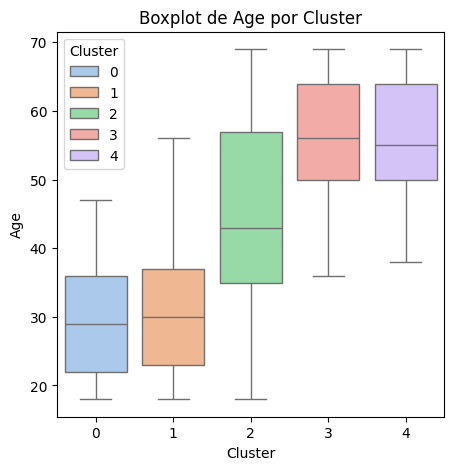

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

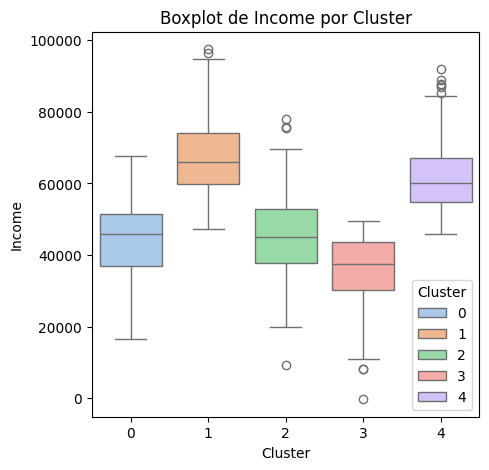

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

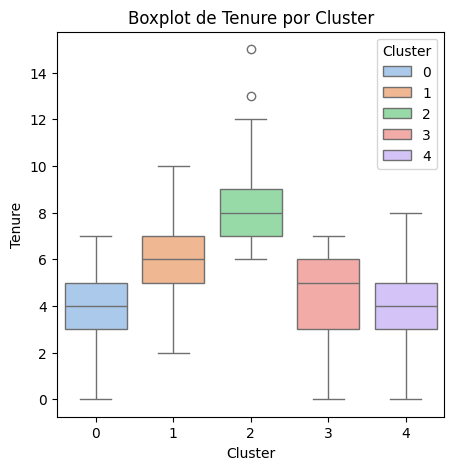

In [ ]:
for col in numerical_features:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x='Cluster', y=col, data=data, hue='Cluster', palette='pastel')
    plt.title(f'Boxplot de {col} por Cluster')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

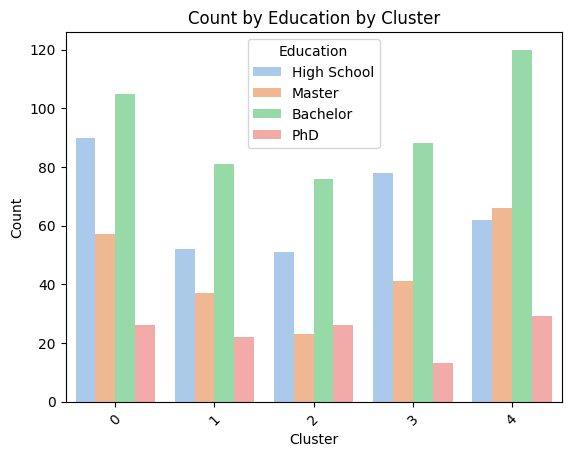

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

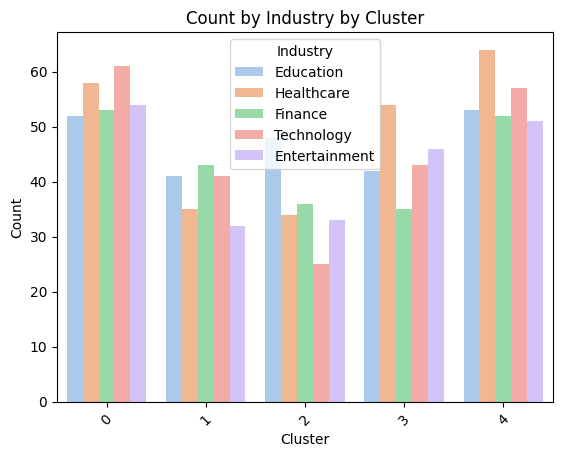

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

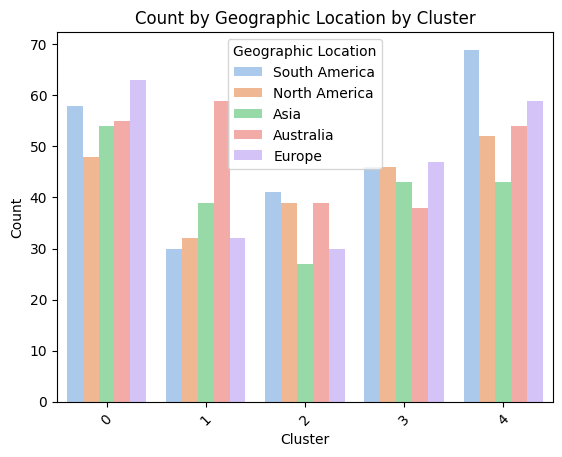

In [ ]:
for col in categorical_features:
    sns.countplot(x='Cluster', hue=col, data=data, palette='pastel')
    plt.title(f'Count by {col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

##Churn

In [ ]:
df_transactions.head()

,CustomerID,TransactionDate,TransactionAmount
0,1,2023-10-31,518.444092
1,1,2024-07-31,353.796197
2,1,2024-01-31,38.206591
3,1,2024-06-30,724.929423
4,2,2022-02-28,145.616000


In [ ]:
data.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,Cluster
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31,4
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28,0
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31,4


In [ ]:
X = df_transactions.merge(data, on = 'CustomerID')
X.head()

,CustomerID,TransactionDate,TransactionAmount,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,Cluster
0,1,2023-10-31,518.444092,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
1,1,2024-07-31,353.796197,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
2,1,2024-01-31,38.206591,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
3,1,2024-06-30,724.929423,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
4,2,2022-02-28,145.616000,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4


In [ ]:
X["TransactionDate"] = pd.to_datetime(X["TransactionDate"])

X.sort_values(by=['CustomerID', 'TransactionDate'])
X.head()

,CustomerID,TransactionDate,TransactionAmount,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,Cluster
0,1,2023-10-31,518.444092,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
1,1,2024-07-31,353.796197,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
2,1,2024-01-31,38.206591,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
3,1,2024-06-30,724.929423,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
4,2,2022-02-28,145.616000,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4


In [ ]:
customer_invoices = X.groupby(['Cluster', 'CustomerID', 'TransactionDate'])['TransactionAmount'].sum().reset_index()
customer_invoices.head()

,Cluster,CustomerID,TransactionDate,TransactionAmount
0,0,4,2021-02-28,350.545374
1,0,4,2021-06-28,42.259824
2,0,4,2021-07-28,22.300978
3,0,4,2021-11-28,322.891563
4,0,4,2023-01-28,357.028148


In [ ]:
sum(customer_invoices["TransactionAmount"] < 0)

0

In [ ]:
customer_invoices_clean = customer_invoices[customer_invoices['TransactionAmount'] > 0].copy().dropna()

snapshot_date = customer_invoices_clean['TransactionDate'].max()
snapshot_date

Timestamp('2024-08-31 00:00:00')

In [ ]:
customer_invoices_clean['DaysBetweenPurchases'] = customer_invoices_clean.groupby(['Cluster', 'CustomerID'])['TransactionDate'].diff().dt.days

general_threshold = customer_invoices_clean['DaysBetweenPurchases'].quantile(0.90)
general_threshold

426.0

In [ ]:
threshold_per_cluster = customer_invoices_clean.groupby('Cluster')['DaysBetweenPurchases'].agg(
    percentile_90=lambda x: x.quantile(0.90),
    transaction_count='count'
).reset_index()

threshold_per_cluster.head()

,Cluster,percentile_90,transaction_count
0,0,438.2,627
1,1,427.0,473
2,2,377.2,527
3,3,413.4,555
4,4,456.0,681


In [ ]:
threshold_per_cluster['threshold'] = threshold_per_cluster.apply(
    lambda row: general_threshold if row['transaction_count'] < 30 else row['percentile_90'],
    axis=1
)

threshold_per_cluster.head()

,Cluster,percentile_90,transaction_count,threshold
0,0,438.2,627,438.2
1,1,427.0,473,427.0
2,2,377.2,527,377.2
3,3,413.4,555,413.4
4,4,456.0,681,456.0


In [ ]:
last_invoice_date_per_customer = customer_invoices_clean.groupby(['Cluster','CustomerID'])['TransactionDate'].max().reset_index().rename(columns={'TransactionDate': 'LastTransactionDate'})

last_invoice_date_per_customer.head()

,Cluster,CustomerID,LastTransactionDate
0,0,4,2023-01-28
1,0,6,2024-02-29
2,0,9,2024-07-30
3,0,10,2020-03-31
4,0,12,2024-01-30


In [ ]:
customers = last_invoice_date_per_customer.merge(threshold_per_cluster, on='Cluster')
customers.head()

,Cluster,CustomerID,LastTransactionDate,percentile_90,transaction_count,threshold
0,0,4,2023-01-28,438.2,627,438.2
1,0,6,2024-02-29,438.2,627,438.2
2,0,9,2024-07-30,438.2,627,438.2
3,0,10,2020-03-31,438.2,627,438.2
4,0,12,2024-01-30,438.2,627,438.2


In [ ]:
customers['inactivity_days'] = (snapshot_date - customers['LastTransactionDate']).dt.days
customers['churned'] = (customers['inactivity_days'] > customers['threshold']).astype('int')

customers.head()

,Cluster,CustomerID,LastTransactionDate,percentile_90,transaction_count,threshold,inactivity_days,churned
0,0,4,2023-01-28,438.2,627,438.2,581,1
1,0,6,2024-02-29,438.2,627,438.2,184,0
2,0,9,2024-07-30,438.2,627,438.2,32,0
3,0,10,2020-03-31,438.2,627,438.2,1614,1
4,0,12,2024-01-30,438.2,627,438.2,214,0


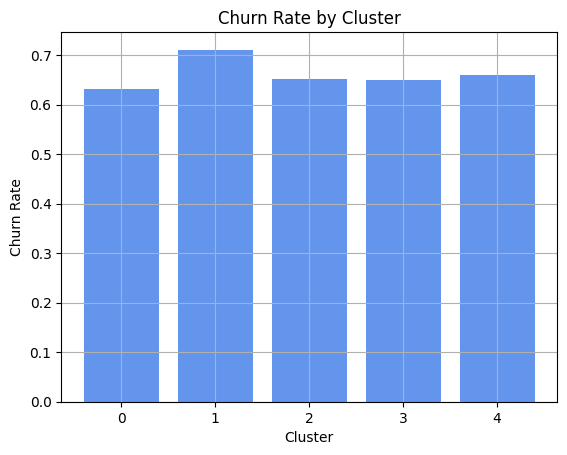

In [ ]:
churned_x_cluster = customers.groupby('Cluster')['churned'].mean()
plt.figure()
plt.grid()
plt.bar(churned_x_cluster.index, churned_x_cluster.values, color="cornflowerblue")
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Cluster')
plt.show()

##Regresión (filtro 2 años)

In [ ]:
df_transactions['TransactionDate'] = pd.to_datetime(df_transactions['TransactionDate'])

data['Cohort'] = pd.to_datetime(data['Cohort'])

snapshot_date = df_transactions['TransactionDate'].max()

data['customer_tenure'] = (snapshot_date.year - data['Cohort'].dt.year) * 12 + (snapshot_date.month - data['Cohort'].dt.month)
data['customer_tenure']

,customer_tenure
0,12
1,36
2,63
3,42
4,70
...,...
1138,56
1139,22
1140,76
1141,70


In [ ]:
df_master = df_transactions.merge(data, on = 'CustomerID')
df_master.head()

,CustomerID,TransactionDate,TransactionAmount,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,Cluster,customer_tenure
0,1,2023-10-31,518.444092,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4,12
1,1,2024-07-31,353.796197,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4,12
2,1,2024-01-31,38.206591,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4,12
3,1,2024-06-30,724.929423,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4,12
4,2,2022-02-28,145.616000,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4,36


In [ ]:
df_master['customer_tenure_on_transaction'] = (df_master['TransactionDate'].dt.year - df_master['Cohort'].dt.year)*12 + (df_master['TransactionDate'].dt.month - df_master['Cohort'].dt.month)
df_master.head()

,CustomerID,TransactionDate,TransactionAmount,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,Cluster,customer_tenure,customer_tenure_on_transaction
0,1,2023-10-31,518.444092,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4,12,2
1,1,2024-07-31,353.796197,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4,12,11
2,1,2024-01-31,38.206591,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4,12,5
3,1,2024-06-30,724.929423,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4,12,10
4,2,2022-02-28,145.616000,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4,36,6


In [ ]:
cltv_24_months = df_master.query("customer_tenure > 24 and customer_tenure_on_transaction <= 24").groupby('CustomerID')['TransactionAmount'].sum().reset_index()
cltv_24_months

,CustomerID,TransactionAmount
0,2,145.616000
1,3,487.285458
2,4,1095.025887
3,5,1685.260152
4,6,728.364381
...,...,...
857,1136,189.961932
858,1138,2375.255820
859,1139,1327.509070
860,1141,718.548745


In [ ]:
categorical_features = ['Education','Industry','Geographic Location']
numerical_features = ['Age','Income','Tenure']

data_encoded = pd.get_dummies(data[['CustomerID'] + categorical_features], columns=categorical_features, drop_first=True)

df_data_with_encoded = data[['CustomerID'] + numerical_features].merge(
    data_encoded, on = 'CustomerID'
)

df_to_model = cltv_24_months.merge(df_data_with_encoded, on = 'CustomerID')
df_to_model

,CustomerID,TransactionAmount,Age,Income,Tenure,Education_High School,Education_Master,Education_PhD,Industry_Entertainment,Industry_Finance,Industry_Healthcare,Industry_Technology,Geographic Location_Australia,Geographic Location_Europe,Geographic Location_North America,Geographic Location_South America
0,2,145.616000,69,55297.364348,6,False,False,False,False,False,False,True,False,False,False,True
1,3,487.285458,46,57978.753383,3,False,False,False,False,True,False,False,False,True,False,False
2,4,1095.025887,32,60445.266900,3,True,False,False,False,False,False,False,False,False,False,True
3,5,1685.260152,60,57741.870929,5,False,False,False,True,False,False,False,False,False,False,False
4,6,728.364381,25,57132.404622,3,False,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1136,189.961932,67,59279.959062,4,True,False,False,False,True,False,False,False,False,False,False
858,1138,2375.255820,28,59996.754751,5,False,False,False,True,False,False,False,False,False,True,False
859,1139,1327.509070,26,45236.402018,8,False,False,False,False,False,False,False,False,True,False,False
860,1141,718.548745,29,57043.387540,5,True,False,False,False,True,False,False,False,False,True,False


In [ ]:
columns_from_education = df_to_model.loc[:, 'Education_High School':].select_dtypes(include='bool').columns
df_to_model[columns_from_education] = df_to_model[columns_from_education].astype(int)
df_to_model.head()

,CustomerID,TransactionAmount,Age,Income,Tenure,Education_High School,Education_Master,Education_PhD,Industry_Entertainment,Industry_Finance,Industry_Healthcare,Industry_Technology,Geographic Location_Australia,Geographic Location_Europe,Geographic Location_North America,Geographic Location_South America
0,2,145.616000,69,55297.364348,6,0,0,0,0,0,0,1,0,0,0,1
1,3,487.285458,46,57978.753383,3,0,0,0,0,1,0,0,0,1,0,0
2,4,1095.025887,32,60445.266900,3,1,0,0,0,0,0,0,0,0,0,1
3,5,1685.260152,60,57741.870929,5,0,0,0,1,0,0,0,0,0,0,0
4,6,728.364381,25,57132.404622,3,0,1,0,0,0,1,0,0,0,1,0


In [ ]:
X1 = ['Age', 'Income','Tenure','Education_High School','Education_Master','Education_PhD','Industry_Entertainment','Industry_Finance',
                 'Industry_Healthcare','Industry_Technology','Geographic Location_Australia','Geographic Location_Europe',
                 'Geographic Location_North America','Geographic Location_South America']
y1 = ['TransactionAmount']

to_remove_x = []
X1 = [item for item in X1 if item not in to_remove_x]

X1 = sm.add_constant(df_to_model[X1])

model_1 = sm.OLS(df_to_model[y1], X1)
results = model_1.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      TransactionAmount   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     8.979
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.53e-18
Time:                        22:09:12   Log-Likelihood:                -6767.4
No. Observations:                 862   AIC:                         1.356e+04
Df Residuals:                     847   BIC:                         1.364e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

##Regresión completa

In [ ]:
df_master2 = df_transactions.merge(data, on = 'CustomerID')
df_master2.head()

,CustomerID,TransactionDate,TransactionAmount,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,Cluster,customer_tenure
0,1,2023-10-31,518.444092,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4,12
1,1,2024-07-31,353.796197,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4,12
2,1,2024-01-31,38.206591,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4,12
3,1,2024-06-30,724.929423,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4,12
4,2,2022-02-28,145.616000,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4,36


In [ ]:
categorical_features = ['Education','Industry','Geographic Location']
numerical_features = ['Age','Income','Tenure']

data_encoded = pd.get_dummies(df_master2[['CustomerID'] + categorical_features], columns=categorical_features, drop_first=True)


df_data_with_encoded = df_master2[['CustomerID'] + numerical_features].merge(
    data_encoded, on = 'CustomerID'
)

cosa = df_data_with_encoded.groupby("CustomerID")[df_data_with_encoded.columns[1:]].mean()
cosa.head()

,Age,Income,Tenure,Education_High School,Education_Master,Education_PhD,Industry_Entertainment,Industry_Finance,Industry_Healthcare,Industry_Technology,Geographic Location_Australia,Geographic Location_Europe,Geographic Location_North America,Geographic Location_South America
CustomerID,,,,,,,,,,,,,,
1,56.0,52752.677346,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,69.0,55297.364348,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,46.0,57978.753383,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,32.0,60445.266900,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,60.0,57741.870929,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
grouped_transactions = pd.DataFrame(df_transactions.groupby('CustomerID')['TransactionAmount'].sum())

todo = grouped_transactions.merge(cosa, on = 'CustomerID')
todo

,TransactionAmount,Age,Income,Tenure,Education_High School,Education_Master,Education_PhD,Industry_Entertainment,Industry_Finance,Industry_Healthcare,Industry_Technology,Geographic Location_Australia,Geographic Location_Europe,Geographic Location_North America,Geographic Location_South America
CustomerID,,,,,,,,,,,,,,,
1,1635.376302,56.0,52752.677346,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,145.616000,69.0,55297.364348,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,787.270757,46.0,57978.753383,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1095.025887,32.0,60445.266900,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,2256.909646,60.0,57741.870929,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1818.844996,26.0,45236.402018,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1140,1432.280169,51.0,39868.078327,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,2039.657938,29.0,57043.387540,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X1 = ['Age', 'Income','Tenure','Education_High School','Education_Master','Education_PhD','Industry_Entertainment','Industry_Finance',
                 'Industry_Healthcare','Industry_Technology','Geographic Location_Australia','Geographic Location_Europe',
                 'Geographic Location_North America','Geographic Location_South America']
y1 = ['TransactionAmount']

to_remove_x = []
X1 = [item for item in X1 if item not in to_remove_x]

X1 = sm.add_constant(todo[X1])

model_1 = sm.OLS(todo[y1], X1)
results = model_1.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      TransactionAmount   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     10.91
Date:                Tue, 08 Oct 2024   Prob (F-statistic):           1.29e-23
Time:                        22:09:13   Log-Likelihood:                -8770.2
No. Observations:                1111   AIC:                         1.757e+04
Df Residuals:                    1096   BIC:                         1.765e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 